<a href="https://colab.research.google.com/github/thanhphap059/NguyenThanhPhap19146230/blob/main/NHAN_DIEN_KHUON_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BÀI 3:NHẬN DIỆN KHUÔN MẶT
#Tên: Nguyễn Thanh Pháp
#MSSV: 19146230
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd"/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_KHUON_MAT/Anh_khuon_mat"

/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_KHUON_MAT/Anh_khuon_mat


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_KHUON_MAT/training_set',target_size=(32,32), batch_size=32, class_mode='categorical')

Found 127 images belonging to 2 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'No': 0, 'Yes': 1}

In [ ]:
# Tạo ra dữ liệu đầu vào và đầu ra từ bộ dữ liệu training set
x_train,y_train=next(training_set)

In [ ]:
x_train.shape

(32, 32, 32, 3)

In [ ]:
y_train.shape

(32, 2)

In [ ]:
# Xử lý dữ liệu training
x_train=x_train.reshape(32,3072)
x_train=x_train.astype ('float32')

In [ ]:
x_train.shape

(32, 3072)

In [ ]:
y_train.shape

(32, 2)

In [ ]:
# Tạo ra mạng ANN để train mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 3072 tín hiệu vào và có 4 tín hiệu ra sử dụng hàm relu
model.add(Dense(4,activation='relu',input_shape=(3072,)))
# Tạo lớp ẩn thứ hai với 4 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ ba với 50 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ tư với 50 tín hiệu vào, 2 tín hiệu ra ra sử dụng hàm softmax
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12292     
                                                                 
 dense_1 (Dense)             (None, 50)                250       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 15,194
Trainable params: 15,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
# Gán biến lại để vẽ đồ thị, với 1000 lần học (epochs), mỗi lần học thì chỉ học␣20 dữ liệu (batch_size), khi sai số không thay đổi trong 200 lần học thì sẽ␣ dừng học 
history=model.fit(x_train,y_train,epochs=1000, batch_size=20,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=200)])

Epoch 1/1000
2/2 [==============================] - 1s 187ms/step - loss: 0.6578 - accuracy: 0.4400 - val_loss: 0.6756 - val_accuracy: 0.4286
Epoch 2/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7795 - accuracy: 0.7200 - val_loss: 0.6814 - val_accuracy: 0.4286
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6991 - accuracy: 0.4800 - val_loss: 0.6941 - val_accuracy: 0.5714
Epoch 4/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5323 - accuracy: 0.7600 - val_loss: 1.0871 - val_accuracy: 0.5714
Epoch 5/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.6272 - accuracy: 0.7200 - val_loss: 0.6197 - val_accuracy: 0.7143
Epoch 6/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4591 - accuracy: 0.9600 - val_loss: 0.9527 - val_accuracy: 0.5714
Epoch 7/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.4679 - accuracy: 0.7600 - val_loss: 0.5705 - val_accuracy: 0.7143
Epoch 8/1000

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 1.095969319343567
Train Accuracy 0.9375


<function matplotlib.pyplot.show>

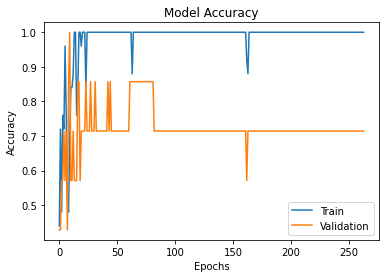

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Nhan_dien_khuon_mat.h5")

In [ ]:
# Tải mô hình 
model_ANN=load_model('Nhan_dien_khuon_mat.h5')

DAY LA PHAP


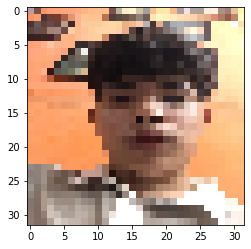

In [ ]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_KHUON_MAT/test_set/Phap (4).jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,3072)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="DAY KHONG PHAI LA PHAP"
if result==1:
  prediction="DAY LA PHAP"
print(prediction)

DAY KHONG PHAI LA PHAP


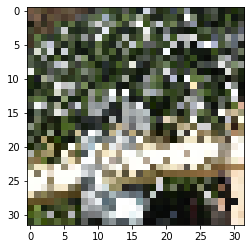

In [ ]:
# Kiểm tra các hình có trong bộ dữ liệu test_set
img=load_img('/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_KHUON_MAT/test_set/No (33).JPG',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,3072)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="DAY KHONG PHAI LA PHAP"
if result==1:
  prediction="DAY LA PHAP"
print(prediction)

In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('NHAN_DIEN_KHUON_MAT.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pathconf: Transport endpoint is not connected
--2022-05-14 08:23:22--  http

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-867664b56fb4>", line 7, in <module>
    colab_pdf('NHAN_DIEN_KHUON_MAT.ipynb')
  File "/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_KHUON_MAT/Anh_khuon_mat/colab_pdf.py", line 22, in colab_pdf
    raise ValueError(f"file '{file_name}' not found in path '{notebookpath}'.")
ValueError: file 'NHAN_DIEN_KHUON_MAT.ipynb' not found in path '/content/drive/MyDrive/Colab Notebooks/'.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurr

ValueError: ignored

# Mục mới

# Mục mới